In [1]:
data = read.csv('tips.csv')

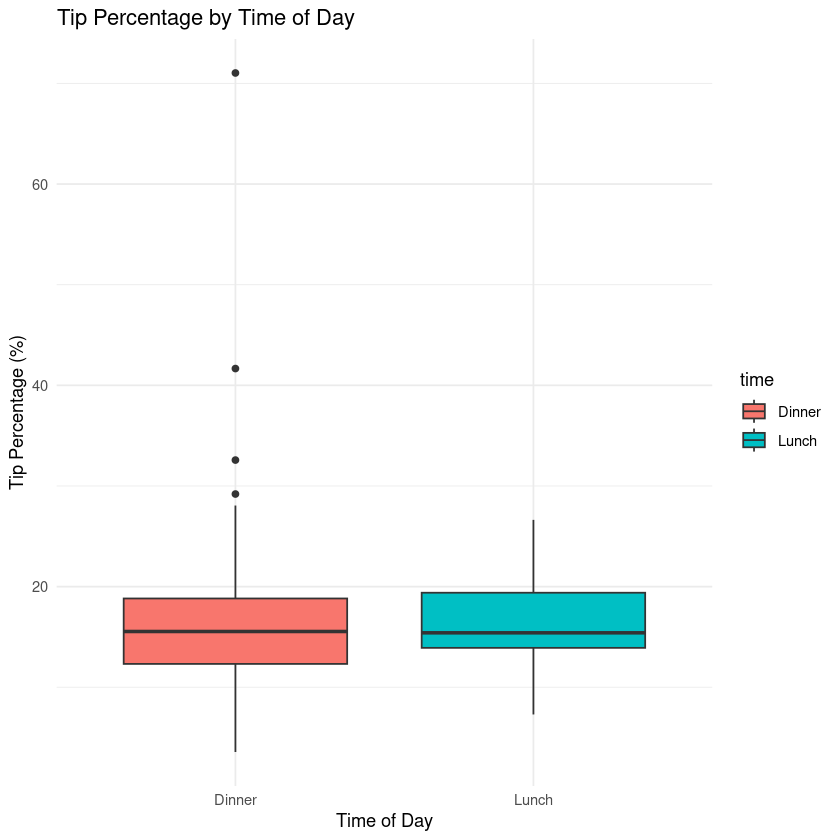

In [2]:
library(ggplot2)

data$tip_percentage <- (data$tip / data$total_bill) * 100

ggplot(data, aes(x = time, y = tip_percentage, fill = time)) +
  geom_boxplot() +
  labs(title = "Tip Percentage by Time of Day",
       x = "Time of Day",
       y = "Tip Percentage (%)") +
  theme_minimal()



In [3]:
ggsave("tip_percentage_by_time.png", width = 8, height = 6)


In [4]:
colSums(is.na(data))


rownames     total_bill            tip            sex         smoker 
             0              0              0              0              0 
           day           time           size tip_percentage 
             0              0              0              0

In [5]:
data$sex <- as.factor(data$sex)
data$smoker <- as.factor(data$smoker)
data$day <- as.factor(data$day)
data$time <- as.factor(data$time)

data$total_bill <- scale(data$total_bill)
data$size <- scale(data$size)

In [6]:
head(sort(data$tip_percentage, decreasing = TRUE))


[1] 71.03448 41.66667 32.57329 29.19897 28.05352 27.95248

In [7]:
data <- data[data$tip_percentage <= 50, ]
head(sort(data$tip_percentage, decreasing = TRUE))


[1] 41.66667 32.57329 29.19897 28.05352 27.95248 26.63116

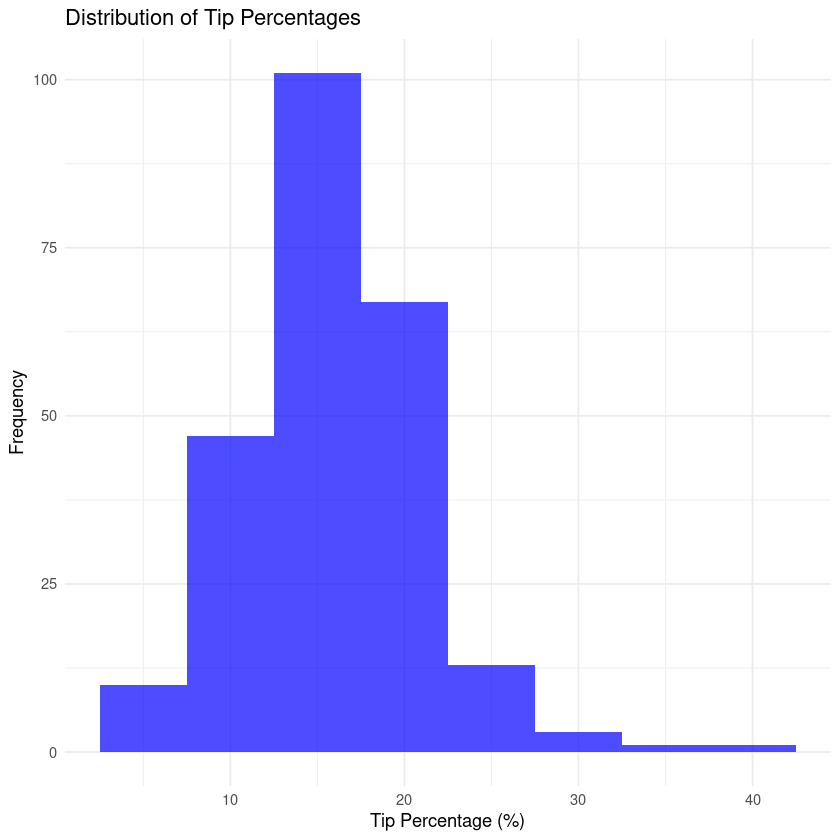

In [8]:
ggplot(data, aes(x = tip_percentage)) +
  geom_histogram(binwidth = 5, fill = "blue", alpha = 0.7) +
  labs(title = "Distribution of Tip Percentages",
       x = "Tip Percentage (%)",
       y = "Frequency") +
  theme_minimal()

In [9]:
library(brms)

formula_non_hierarchical <- bf(
  tip_percentage ~ total_bill + size + sex + smoker + time + day
)

fit_non_hierarchical <- brm(
  formula = formula_non_hierarchical,
  data = data,
  family = gaussian(),
  prior = c(
    prior(normal(0, 10), class = "b"),
    prior(normal(15, 10), class = "Intercept"),
    prior(cauchy(0, 2), class = "sigma")
  ),
  chains = 4,
  iter = 2000,
  warmup = 1000,
  control = list(adapt_delta = 0.95),
  seed = 123
)


Loading required package: Rcpp

Loading 'brms' package (version 2.22.6). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.242 seconds (Warm-up)
Chain 1:                0.176 seconds (Sampling)
Chain 1:                0.41

In [10]:
# Define the hierarchical model formula
formula_hierarchical <- bf(
  tip_percentage ~ total_bill + size + sex + smoker + (1 | time) + (1 | day)
)

# Run the hierarchical model
fit_hierarchical <- brm(
  formula = formula_hierarchical,
  data = data,
  family = gaussian(),
  prior = c(
    prior(normal(0, 10), class = "b"),
    prior(normal(15, 10), class = "Intercept"),
    prior(cauchy(0, 2), class = "sd"),
    prior(cauchy(0, 2), class = "sigma")
  ),
  chains = 4,
  iter = 4000,
  warmup = 2000,
  control = list(adapt_delta = 0.999, max_treedepth = 20),
  seed = 123
)


Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000135 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.35 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 9.106 seconds (Warm-up)
Chain 1:                8.091 seconds (Sampling)
Chain 1:                17.

Warning message:
“There were 1 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.999 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: tip_percentage ~ total_bill + size + sex + smoker + (1 | time) + (1 | day) 
   Data: data (Number of observations: 243) 
  Draws: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~day (Number of levels: 4) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.69      0.71     0.02     2.44 1.00     3750     3966

~time (Number of levels: 2) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.26      1.74     0.03     5.62 1.00     3272     3918

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     16.20      1.44    13.37    19.09 1.00     2682     2554
total_bill    -2.05      0.39    -2.82    -1.28 1.00     5603     5886
size           0.52      0.39    -0.24     1.29 1.00     5281     5658
sexMale  

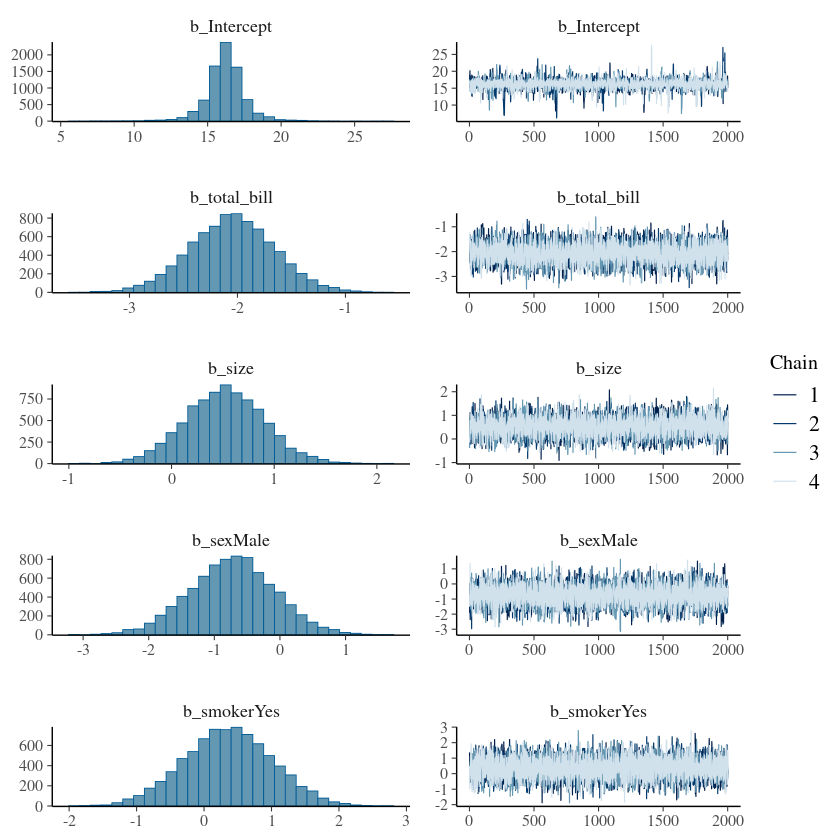


Divergences:


1 of 8000 iterations ended with a divergence (0.0125%).
Try increasing 'adapt_delta' to remove the divergences.




Tree depth:


0 of 8000 iterations saturated the maximum tree depth of 20.




Energy:


E-BFMI indicated no pathological behavior.



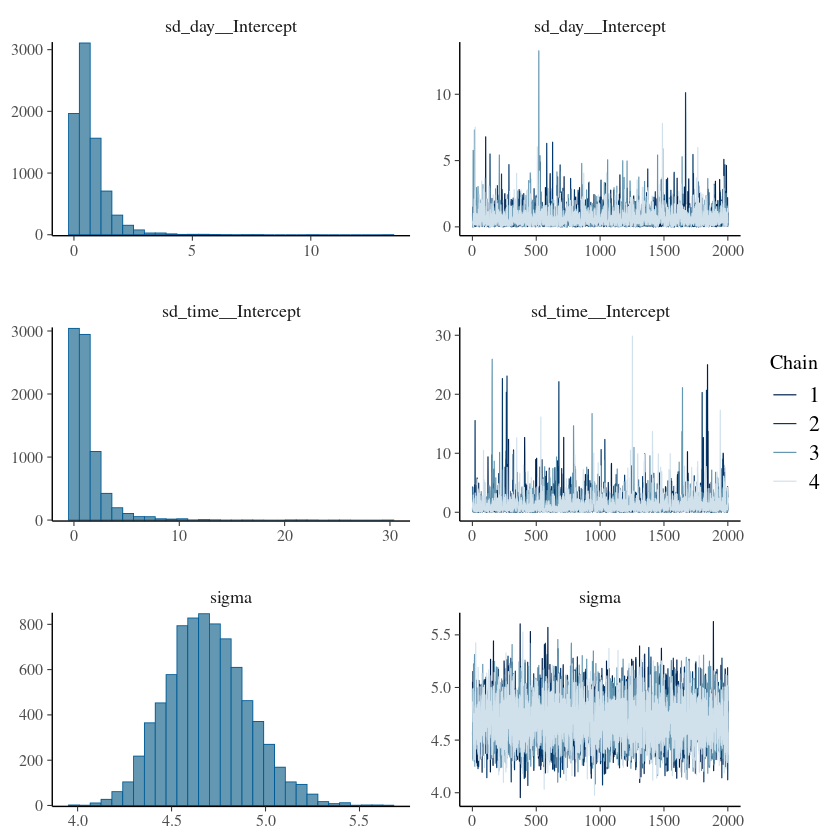

In [11]:
#summary(fit_non_hierarchical)
summary(fit_hierarchical)

#plot(fit_non_hierarchical)
plot(fit_hierarchical)

#rstan::check_hmc_diagnostics(fit_non_hierarchical$fit)
rstan::check_hmc_diagnostics(fit_hierarchical$fit)


Using 10 posterior draws for ppc type 'dens_overlay' by default.



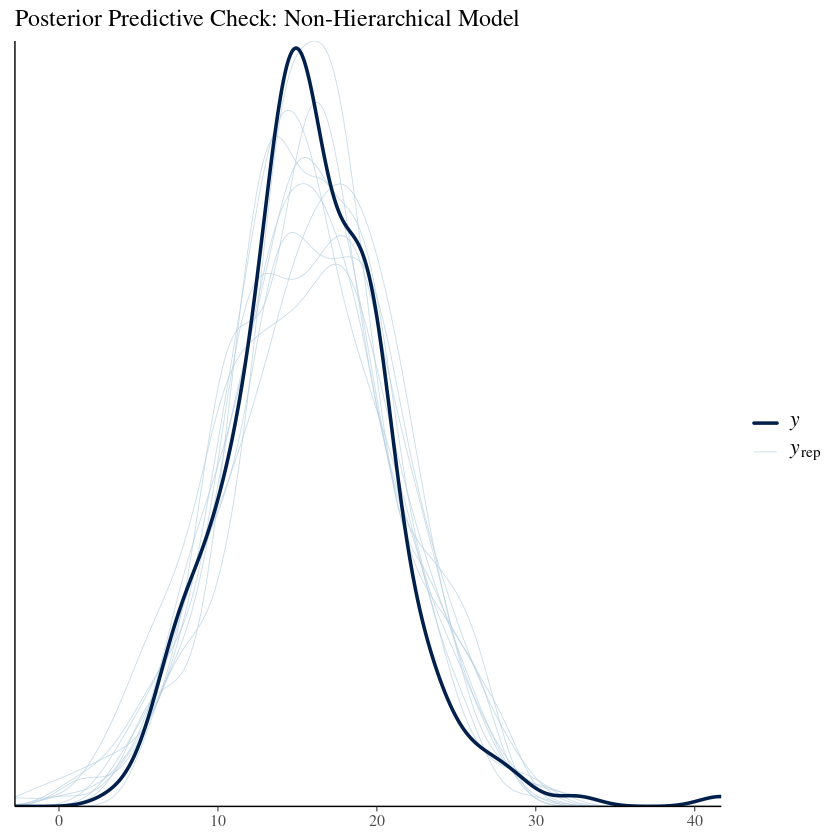

In [12]:
# Posterior predictive checks for non-hierarchical model
pp_check(fit_non_hierarchical, type = "dens_overlay") +
  ggtitle("Posterior Predictive Check: Non-Hierarchical Model")


Using 10 posterior draws for ppc type 'dens_overlay_grouped' by default.

Using 10 posterior draws for ppc type 'dens_overlay_grouped' by default.



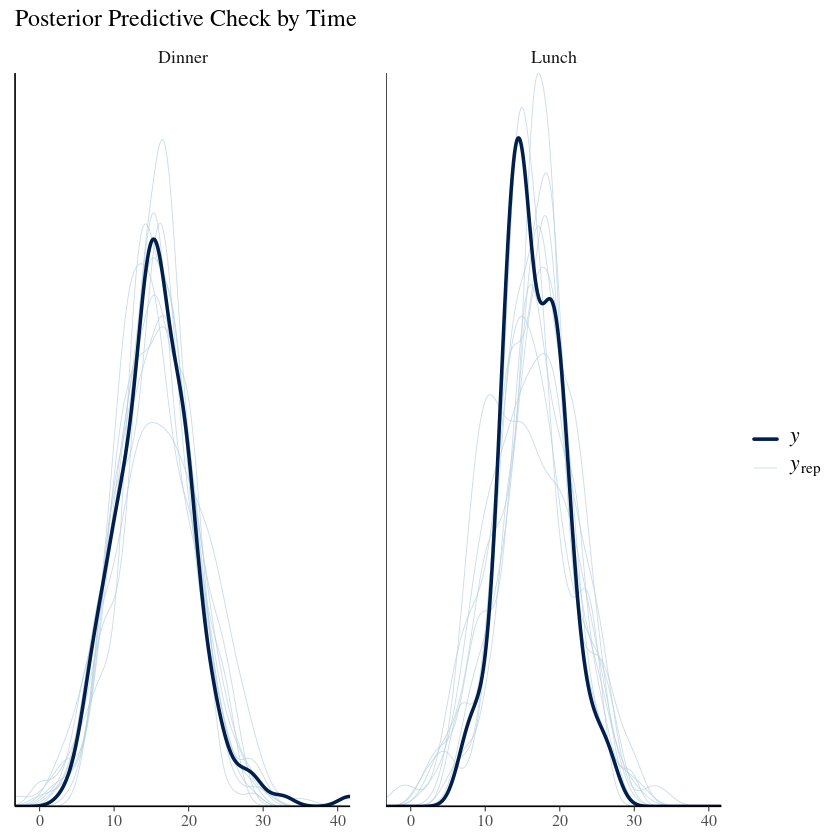

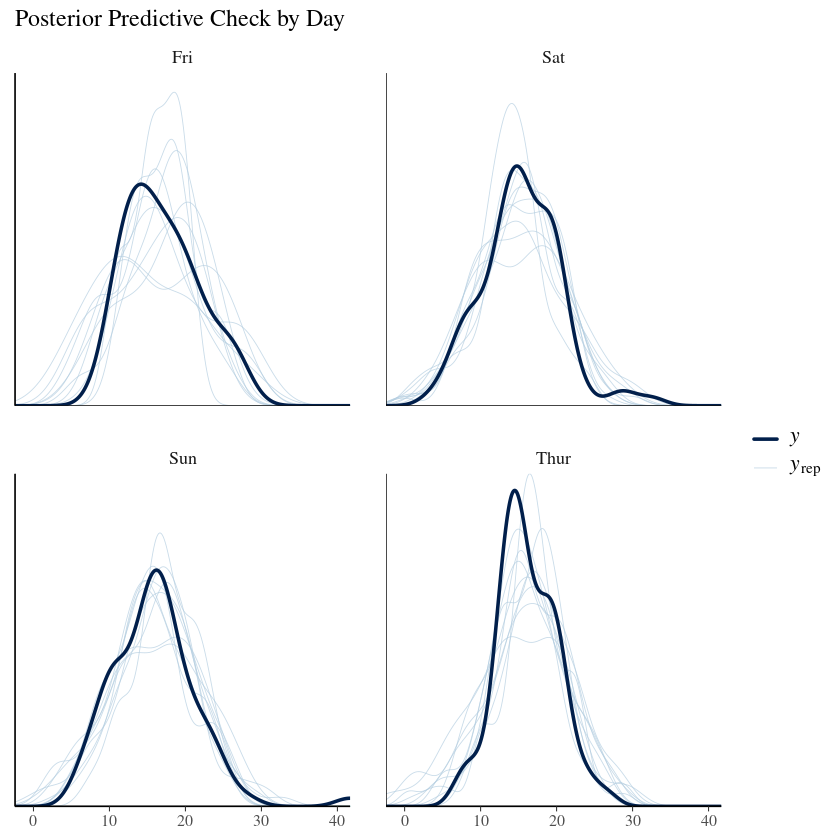

In [13]:
# Group-specific posterior predictive checks for time
pp_check(fit_hierarchical, type = "dens_overlay_grouped", group = "time") +
  ggtitle("Posterior Predictive Check by Time")

# Group-specific posterior predictive checks for day
pp_check(fit_hierarchical, type = "dens_overlay_grouped", group = "day") +
  ggtitle("Posterior Predictive Check by Day")


In [14]:
# Non-hierarchical model with alternative priors
fit_non_hierarchical_sensitivity <- brm(
  formula = tip_percentage ~ total_bill + size + sex + smoker + time + day,
  data = data,
  family = gaussian(),
  prior = c(
    prior(normal(0, 5), class = "b"),           # Narrower prior for coefficients
    prior(normal(15, 10), class = "Intercept"), # Same prior for intercept
    prior(normal(0, 2), class = "sigma")        # Alternative prior for residual std dev
  ),
  chains = 4,
  iter = 4000,
  warmup = 2000,
  seed = 123
)


Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.263 seconds (Warm-up)
Chain 1:                0.205 seconds (Sampling)
Chain 1:                0.46

In [15]:
fit_hierarchical_sensitivity <- brm(
  formula = tip_percentage ~ total_bill + size + sex + smoker + (1 | time) + (1 | day),
  data = data,
  family = gaussian(),
  prior = c(
    prior(normal(0, 10), class = "b"),           # Same prior for coefficients
    prior(normal(15, 10), class = "Intercept"),  # Same prior for intercept
    prior(normal(0, 2), class = "sd"),           # Alternative prior for group-level std dev
    prior(normal(0, 2), class = "sigma")         # Alternative prior for residual std dev
  ),
  chains = 4,
  iter = 4000,
  warmup = 2000,
  control = list(adapt_delta = 0.99),  # Increased adapt_delta
  seed = 123
)


Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000123 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.23 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 6.961 seconds (Warm-up)
Chain 1:                4.599 seconds (Sampling)
Chain 1:                11.

Warning message:
“There were 2 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [16]:
# Summarize original and sensitivity models
summary(fit_non_hierarchical)
summary(fit_non_hierarchical_sensitivity)



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: tip_percentage ~ total_bill + size + sex + smoker + time + day 
   Data: data (Number of observations: 243) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     16.37      1.41    13.62    19.12 1.00     2800     2836
total_bill    -2.01      0.39    -2.76    -1.26 1.00     2837     2779
size           0.48      0.40    -0.30     1.24 1.00     2620     2894
sexMale       -0.78      0.67    -2.09     0.51 1.00     4535     3217
smokerYes      0.35      0.66    -0.99     1.62 1.00     4119     3047
timeLunch      1.03      1.94    -2.93     4.95 1.00     2355     2159
daySat        -0.52      1.36    -3.11     2.17 1.00     2618     2666
daySun         0.36      1.44    -2.41     3.26 1.00     2587     2788
dayThur       -1.38      1.71    -4.75     1.90 1

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: tip_percentage ~ total_bill + size + sex + smoker + time + day 
   Data: data (Number of observations: 243) 
  Draws: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup draws = 8000

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     16.34      1.34    13.66    18.94 1.00     5931     6004
total_bill    -2.01      0.39    -2.77    -1.26 1.00     7985     6429
size           0.47      0.38    -0.28     1.21 1.00     8067     6710
sexMale       -0.76      0.64    -2.01     0.49 1.00    12073     5263
smokerYes      0.35      0.67    -1.00     1.66 1.00     9913     5965
timeLunch      0.90      1.80    -2.59     4.46 1.00     6041     5846
daySat        -0.49      1.31    -3.00     2.07 1.00     5602     5567
daySun         0.38      1.35    -2.27     3.12 1.00     5468     5696
dayThur       -1.22      1.65    -4.45     2.04 1

In [17]:

summary(fit_hierarchical)
summary(fit_hierarchical_sensitivity)

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.999 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: tip_percentage ~ total_bill + size + sex + smoker + (1 | time) + (1 | day) 
   Data: data (Number of observations: 243) 
  Draws: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~day (Number of levels: 4) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.69      0.71     0.02     2.44 1.00     3750     3966

~time (Number of levels: 2) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.26      1.74     0.03     5.62 1.00     3272     3918

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     16.20      1.44    13.37    19.09 1.00     2682     2554
total_bill    -2.05      0.39    -2.82    -1.28 1.00     5603     5886
size           0.52      0.39    -0.24     1.29 1.00     5281     5658
sexMale  

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: tip_percentage ~ total_bill + size + sex + smoker + (1 | time) + (1 | day) 
   Data: data (Number of observations: 243) 
  Draws: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~day (Number of levels: 4) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.70      0.63     0.03     2.38 1.00     3294     3306

~time (Number of levels: 2) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.05      0.96     0.03     3.61 1.00     3580     4085

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     16.23      1.19    13.73    18.69 1.00     3797     3089
total_bill    -2.04      0.39    -2.80    -1.30 1.00     6137     5931
size           0.51      0.38    -0.24     1.28 1.00     6472     5724
sexMale  

In [18]:
# Compute LOO-CV for the non-hierarchical model
loo_non_hierarchical <- loo(fit_non_hierarchical)

# Compute LOO-CV for the hierarchical model
loo_hierarchical <- loo(fit_hierarchical)

# Compare the LOO-CV scores
loo_compare(loo_non_hierarchical, loo_hierarchical)


,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
fit_hierarchical,0.000000,0.0000000,-725.4241,16.29308,9.246285,2.107211,1450.848,32.58615
fit_non_hierarchical,-1.739991,0.8551244,-727.1640,16.17800,11.084591,2.301578,1454.328,32.35601


In [19]:
##MODELS

Warning message:
“Argument 'nsamples' is deprecated. Please use argument 'ndraws' instead.”
Warning message:
“Argument 'nsamples' is deprecated. Please use argument 'ndraws' instead.”


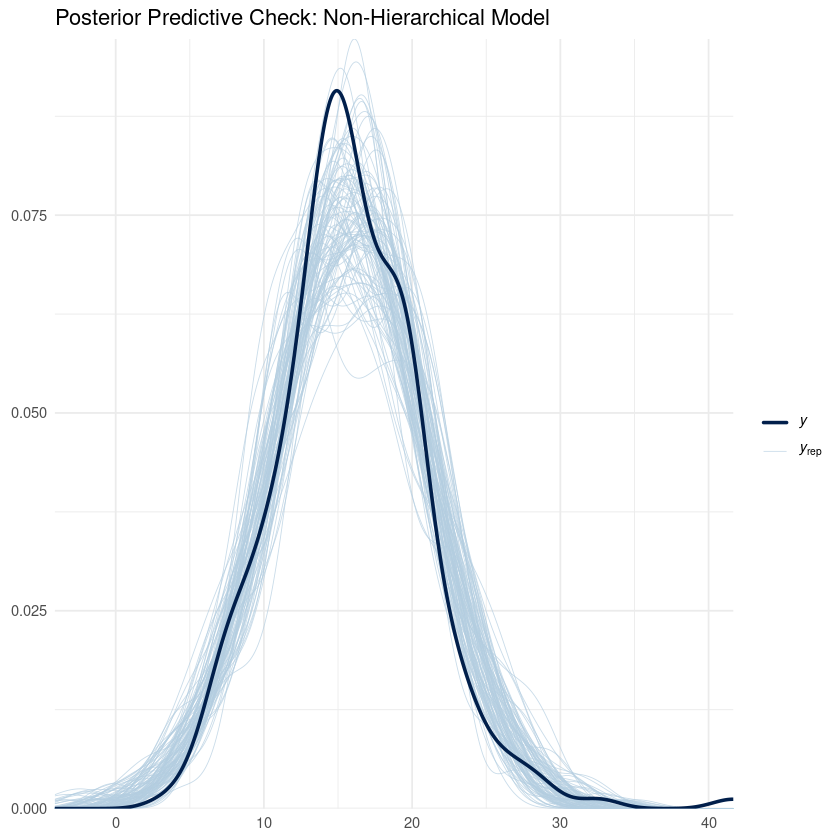

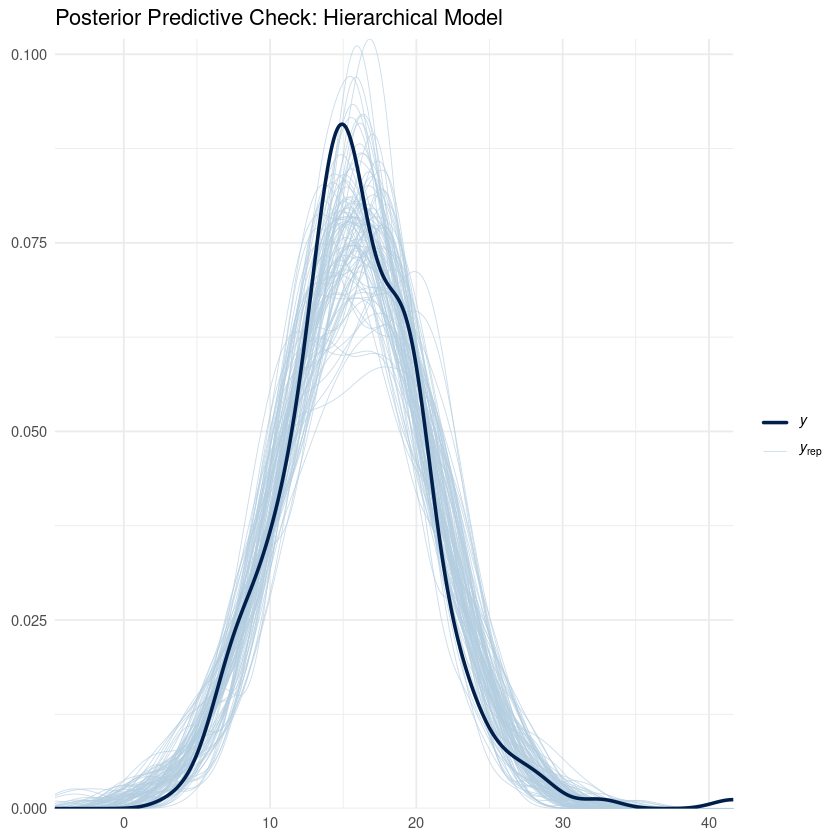

In [22]:
#POSTERIOR PREDICTIVE CHECKS
# Posterior predictive checks for non-hierarchical model
pp_check(fit_non_hierarchical, nsamples = 100) +
  ggtitle("Posterior Predictive Check: Non-Hierarchical Model") +
  theme_minimal()

# Posterior predictive checks for hierarchical model
pp_check(fit_hierarchical, nsamples = 100) +
  ggtitle("Posterior Predictive Check: Hierarchical Model") +
  theme_minimal()

# Save figures
ggsave("posterior_predictive_non_hierarchical.png", width = 8, height = 6)
ggsave("posterior_predictive_hierarchical.png", width = 8, height = 6)


This is bayesplot version 1.11.1.9000

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:brms’:

    rhat




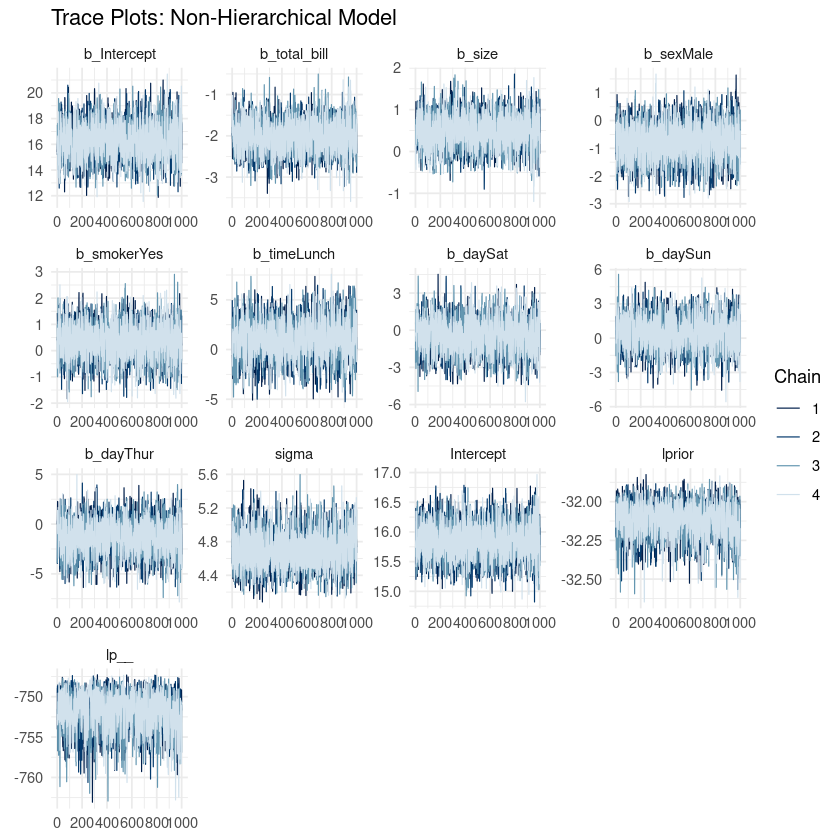

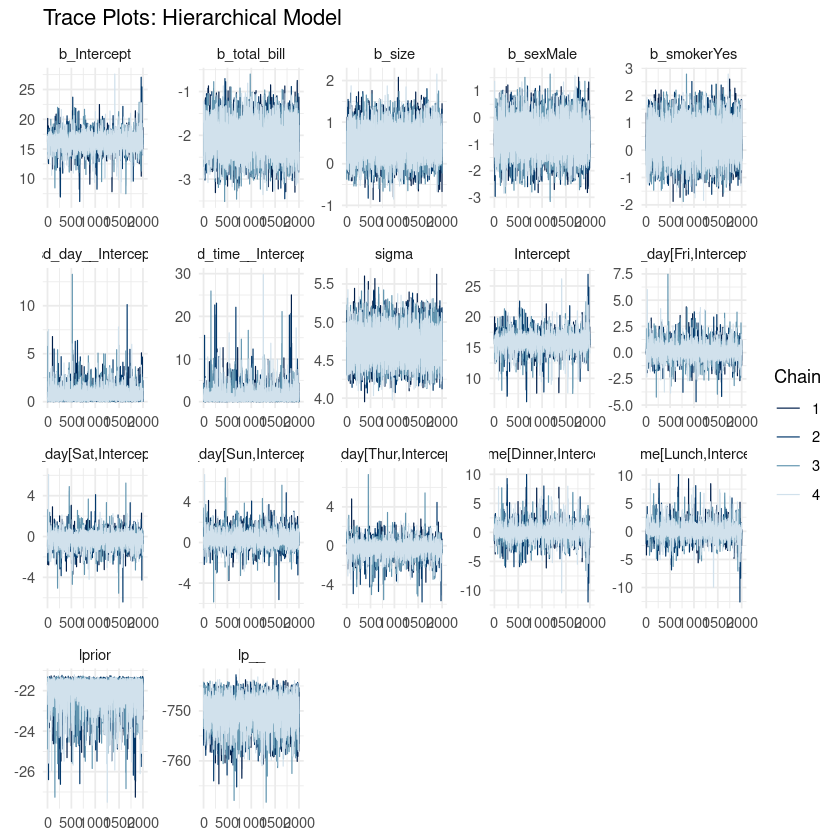

In [27]:
#CONVERGENCE DIAGNOSTICS
# Load bayesplot package
library(bayesplot)

# Trace plots for parameters in the non-hierarchical model
mcmc_trace(as.array(fit_non_hierarchical)) +
  ggtitle("Trace Plots: Non-Hierarchical Model") +
  theme_minimal()

# Trace plots for hierarchical model
mcmc_trace(as.array(fit_hierarchical)) +
  ggtitle("Trace Plots: Hierarchical Model") +
  theme_minimal()



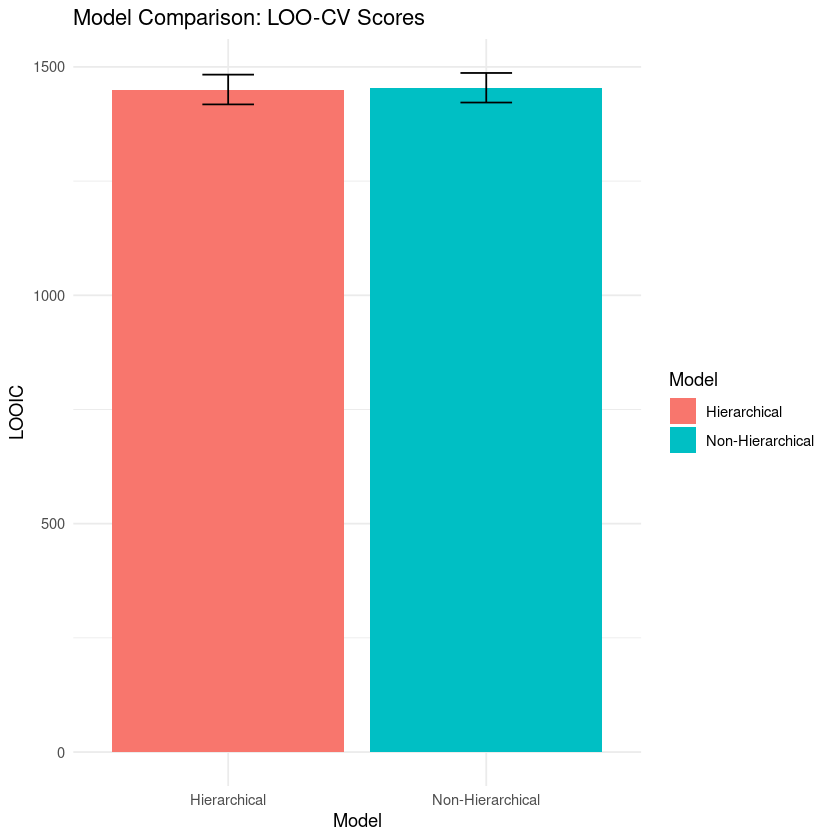

In [26]:
# LOO-CV scores comparison
library(tibble)
library(ggplot2)

# Create a data frame for visualization
loo_results <- tibble(
  Model = c("Non-Hierarchical", "Hierarchical"),
  LOOIC = c(1454.328, 1450.488),
  SE_LOOIC = c(32.35601, 32.58615)
)

# Plot LOO-CV results
ggplot(loo_results, aes(x = Model, y = LOOIC, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_errorbar(aes(ymin = LOOIC - SE_LOOIC, ymax = LOOIC + SE_LOOIC),
                width = 0.2, position = position_dodge(0.9)) +
  ggtitle("Model Comparison: LOO-CV Scores") +
  ylab("LOOIC") +
  theme_minimal()

# Save figure
ggsave("model_comparison_loo_cv.png", width = 8, height = 6)
